In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

50.204529685616535 140.81823438900574
-80.04203986117325 -158.86654532889492
64.6452754428426 143.47412669143597
-6.341229039514502 132.61813442235098
11.564512654887295 -157.91910266158402
-10.843592855095423 -128.00851474410283
39.214199401760254 76.66087282860866
5.052478899386287 -140.25763816770834
83.414258373781 -90.69321616859268
-23.07367740703151 -126.7561637879497
15.681885581211318 -143.380508629871
-8.986121973201051 11.612527588522283
-41.84894155616793 -135.2357110328407
66.57665639039999 68.77849673376335
13.546474693658752 -104.99045516005968
43.46039022375524 161.41360539542575
-1.63169005525981 40.5884358462562
-85.93736359378302 159.36359212279604
89.3411385043442 85.1520394129405
-34.23216027712881 -150.82873956278516
39.33225859267819 150.97612882948772
54.42856226629553 149.40586088117067
2.2758661254195545 50.71081074974131
-6.7380211525458975 21.13589446254241
-65.2537974596021 -125.504977192064
-82.9315284369451 135.66369530763228
-57.43374838577692 -54.059497

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1943624cffafddb61326913a0a7412c


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vanino
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | tual
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | kashi
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | luanda
Processing Record 11 of Set 1 | aksarka
Processing Record 12 of Set 1 | lazaro cardenas
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | lamu
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 1 | magadan
Processing Record 19 of Set 1 | hobyo
Processing Record 20 of Set 1 | tshikapa
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | cidreir

Processing Record 36 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 37 of Set 4 | morondava
Processing Record 38 of Set 4 | grand gaube
Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | demirci
Processing Record 41 of Set 4 | linjiang
Processing Record 42 of Set 4 | samarai
Processing Record 43 of Set 4 | tomatlan
Processing Record 44 of Set 4 | kibala
Processing Record 45 of Set 4 | marrakesh
Processing Record 46 of Set 4 | dubti
Processing Record 47 of Set 4 | burgeo
Processing Record 48 of Set 4 | belmonte
Processing Record 49 of Set 4 | ixtapa
Processing Record 50 of Set 4 | chau doc
Processing Record 1 of Set 5 | trairi
Processing Record 2 of Set 5 | suzu
City not found. Skipping...
Processing Record 3 of Set 5 | jumla
Processing Record 4 of Set 5 | clyde river
Processing Record 5 of Set 5 | dzhebariki-khaya
Processing Record 6 of Set 5 | borova
Processing Record 7 of Set 5 | lebu
Processing Record 8 of Set 5 | nerchinskiy zavod
Processin

Processing Record 29 of Set 8 | sofiysk
City not found. Skipping...
Processing Record 30 of Set 8 | amudat
Processing Record 31 of Set 8 | andenes
Processing Record 32 of Set 8 | north platte
Processing Record 33 of Set 8 | la ronge
Processing Record 34 of Set 8 | mirandopolis
Processing Record 35 of Set 8 | anahuac
Processing Record 36 of Set 8 | kloulklubed
Processing Record 37 of Set 8 | west plains
Processing Record 38 of Set 8 | sayyan
Processing Record 39 of Set 8 | longjiang
Processing Record 40 of Set 8 | lotofaga
Processing Record 41 of Set 8 | jaca
Processing Record 42 of Set 8 | naze
Processing Record 43 of Set 8 | suao
City not found. Skipping...
Processing Record 44 of Set 8 | pimentel
Processing Record 45 of Set 8 | dunedin
Processing Record 46 of Set 8 | cayenne
Processing Record 47 of Set 8 | makakilo city
Processing Record 48 of Set 8 | valle hermoso
Processing Record 49 of Set 8 | amderma
City not found. Skipping...
Processing Record 50 of Set 8 | solaro
Processing Re

Processing Record 14 of Set 12 | nemuro
Processing Record 15 of Set 12 | misasi
Processing Record 16 of Set 12 | lorengau
Processing Record 17 of Set 12 | hirapur
Processing Record 18 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 19 of Set 12 | ondangwa
Processing Record 20 of Set 12 | sorland
Processing Record 21 of Set 12 | puerto colombia
Processing Record 22 of Set 12 | betare oya
Processing Record 23 of Set 12 | aleppo
Processing Record 24 of Set 12 | taltal
Processing Record 25 of Set 12 | xai-xai
Processing Record 26 of Set 12 | burnie
Processing Record 27 of Set 12 | ocean springs
Processing Record 28 of Set 12 | biak
Processing Record 29 of Set 12 | inhambane
Processing Record 30 of Set 12 | sitka
Processing Record 31 of Set 12 | lahat
Processing Record 32 of Set 12 | vestmanna
Processing Record 33 of Set 12 | tungkang
City not found. Skipping...
Processing Record 34 of Set 12 | andarab
City not found. Skipping...
Processing Record 35 of Set 12 | berc

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vanino,49.0869,140.2543,79.14,56,4,3.33,RU,2022-07-01 22:59:34
1,Mataura,-46.1927,168.8643,45.48,90,84,3.67,NZ,2022-07-01 22:59:34
2,Ust-Nera,64.5667,143.2000,60.73,65,93,3.94,RU,2022-07-01 22:59:35
3,Tual,-5.6667,132.7500,80.74,83,90,18.92,ID,2022-07-01 22:59:35
4,Hilo,19.7297,-155.0900,87.28,84,99,1.99,US,2022-07-01 22:59:35
5,Atuona,-9.8000,-139.0333,77.34,74,3,8.08,PF,2022-07-01 22:59:35
6,Kashi,39.4547,75.9797,81.61,13,40,4.47,CN,2022-07-01 22:59:36
7,Qaanaaq,77.4840,-69.3632,42.33,69,66,4.41,GL,2022-07-01 22:59:36
8,Rikitea,-23.1203,-134.9692,72.01,75,86,15.77,PF,2022-07-01 22:59:36
9,Luanda,-8.8368,13.2343,69.80,88,20,6.91,AO,2022-07-01 22:59:37


In [13]:
#Setup new new_column_order=[“column1”, “column8”, “column9”, “column2”, “column3”, “column4”, “column5”, “column6”, “column7”] 

new_column_order=["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vanino,RU,2022-07-01 22:59:34,49.0869,140.2543,79.14,56,4,3.33
1,Mataura,NZ,2022-07-01 22:59:34,-46.1927,168.8643,45.48,90,84,3.67
2,Ust-Nera,RU,2022-07-01 22:59:35,64.5667,143.2000,60.73,65,93,3.94
3,Tual,ID,2022-07-01 22:59:35,-5.6667,132.7500,80.74,83,90,18.92
4,Hilo,US,2022-07-01 22:59:35,19.7297,-155.0900,87.28,84,99,1.99
5,Atuona,PF,2022-07-01 22:59:35,-9.8000,-139.0333,77.34,74,3,8.08
6,Kashi,CN,2022-07-01 22:59:36,39.4547,75.9797,81.61,13,40,4.47
7,Qaanaaq,GL,2022-07-01 22:59:36,77.4840,-69.3632,42.33,69,66,4.41
8,Rikitea,PF,2022-07-01 22:59:36,-23.1203,-134.9692,72.01,75,86,15.77
9,Luanda,AO,2022-07-01 22:59:37,-8.8368,13.2343,69.80,88,20,6.91


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

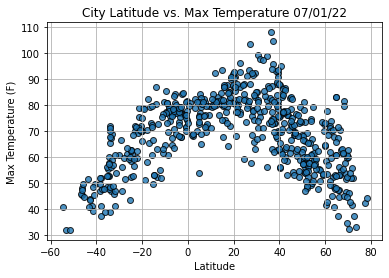

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

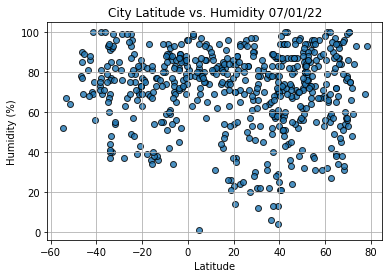

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

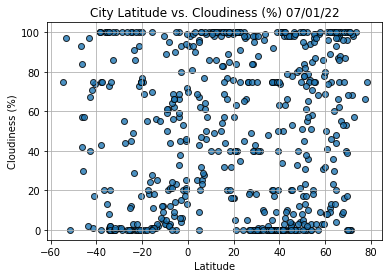

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

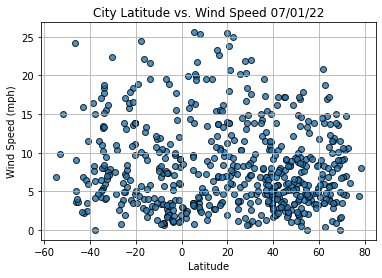

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [59]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [60]:
index13 = city_data_df.loc[13]
index13

City                         Lamu
Country                        KE
Date          2022-07-01 22:59:38
Lat                       -2.2717
Lng                        40.902
Max Temp                    76.35
Humidity                       76
Cloudiness                     20
Wind Speed                  17.76
Name: 13, dtype: object

In [61]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
569    False
570     True
571    False
572     True
573     True
Name: Lat, Length: 574, dtype: bool

In [62]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vanino,RU,2022-07-01 22:59:34,49.0869,140.2543,79.14,56,4,3.33
2,Ust-Nera,RU,2022-07-01 22:59:35,64.5667,143.2000,60.73,65,93,3.94
4,Hilo,US,2022-07-01 22:59:35,19.7297,-155.0900,87.28,84,99,1.99
6,Kashi,CN,2022-07-01 22:59:36,39.4547,75.9797,81.61,13,40,4.47
7,Qaanaaq,GL,2022-07-01 22:59:36,77.4840,-69.3632,42.33,69,66,4.41


In [63]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

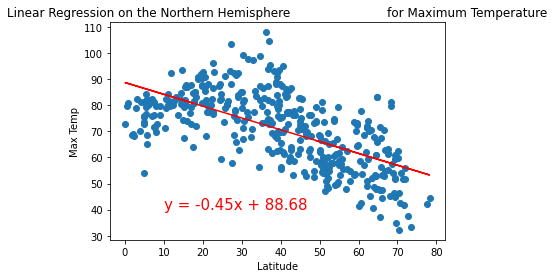

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

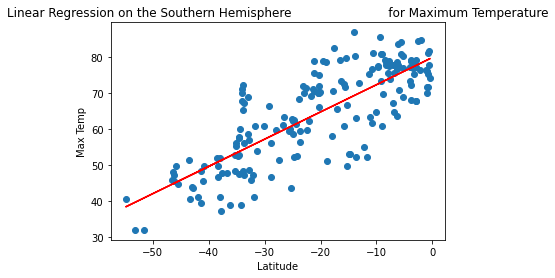

In [65]:
#Linear regression on the Southern Hemisphere
#y=0.73x+ 77.98
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

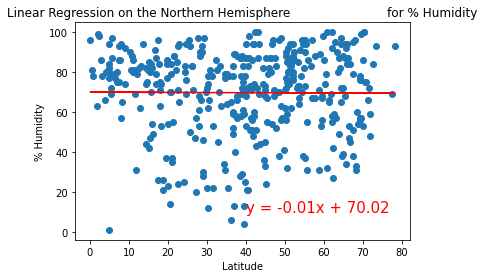

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

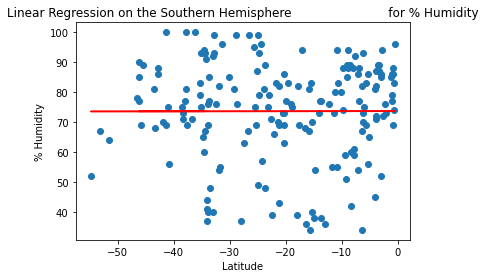

In [67]:
# Linear regression on the Southern Hemisphere
#y= 0.03x+ 71.66
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

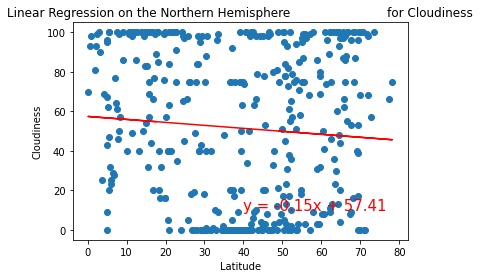

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

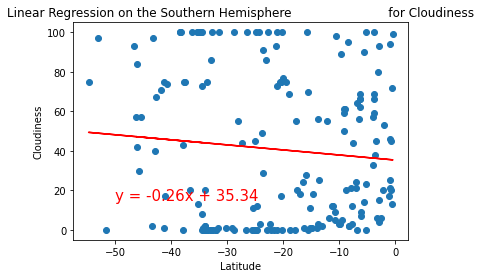

In [69]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,15))

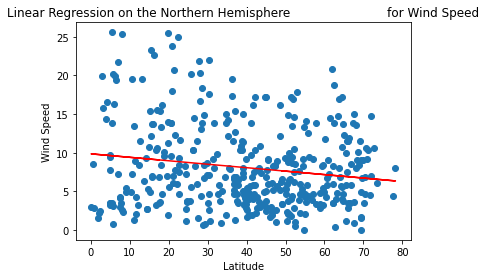

In [70]:
# Linear regression on the Northern Hemisphere
#y= -0.02x +9.14
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

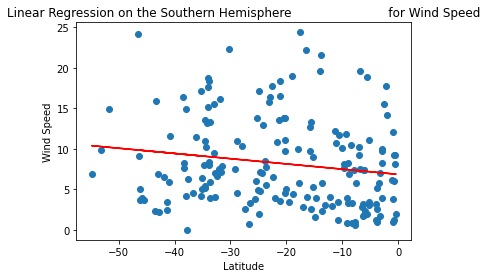

In [71]:
# Linear regression on the Southern Hemisphere
#y= -0.1x +6.25
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))